In [1]:
import pandas as pd
import numpy as np

# Load raw CSV
df = pd.read_csv("../data/raw/_SELECT_A_object_id_A_complex_id_A_vote_reason_id_B_reason_A_dat_202110291714.csv")
df.shape, df.head(3)

((32183, 7),
    object_id           complex_id  vote_reason_id  \
 0  112885551      972359147075013               6   
 1  112795026  9199332346275186185               1   
 2  112795026  9199332346275186185               1   
 
                                          reason         date_created  \
 0  It contains threats, lewdness or hate speech  2021-09-27 13:52:34   
 1                  It's for the wrong community  2021-08-23 17:11:15   
 2                  It's for the wrong community  2021-08-23 16:55:42   
 
           date_updated                                        review_text  
 0  2021-09-27 13:52:34  Initially I was excited about moving to Settle...  
 1  2021-08-23 17:11:15  Love my apartment and the staff here. I like t...  
 2  2021-08-23 16:55:42  Love my apartment and the staff here. I like t...  )

In [2]:
# Step 2 - Data Cleaning and Preparation

# 1. Standardize column names
df.columns = [c.strip() for c in df.columns]
print("Columns:", df.columns.tolist())

# 2. Check missing values
missing_ratio = df.isna().mean().sort_values(ascending=False)
print("\nMissing value ratio (Top 10):")
display(missing_ratio.head(10))

# 3. Remove empty or too-short review texts
df["review_text"] = df["review_text"].astype(str).str.strip()
df = df[df["review_text"].str.len() >= 3].copy()

# 4. Convert date columns
df["date_created"] = pd.to_datetime(df["date_created"], errors="coerce")
df["date_updated"] = pd.to_datetime(df["date_updated"], errors="coerce")

# 5. Create derived features
df["text_len"] = df["review_text"].str.len()
df["day_of_week"] = df["date_created"].dt.day_name()
df["hour_of_day"] = df["date_created"].dt.hour

# 6. Basic stats check
print("\nNumber of rows after cleaning:", len(df))
print("Average review length:", round(df["text_len"].mean(), 1))

# 7. Save the cleaned dataset
df.to_csv("data/processed/reported_reviews_clean.csv", index=False)
print("\n✅ Saved cleaned data to data/processed/reported_reviews_clean.csv")


Columns: ['object_id', 'complex_id', 'vote_reason_id', 'reason', 'date_created', 'date_updated', 'review_text']

Missing value ratio (Top 10):


object_id         0.0
complex_id        0.0
vote_reason_id    0.0
reason            0.0
date_created      0.0
date_updated      0.0
review_text       0.0
dtype: float64


Number of rows after cleaning: 32180
Average review length: 979.7

✅ Saved cleaned data to data/processed/reported_reviews_clean.csv


Matplotlib is building the font cache; this may take a moment.


reason
It contains false information                                     6794
It was posted by a competitor, ex-employee or evicted resident    6167
It contains threats, lewdness or hate speech                      5546
It violates ApartmentRatings' privacy standards                   4381
It was posted by someone affiliated with the community            4129
It's for the wrong community                                      2017
It contains irrelevant information that is not useful             1798
It contains promotional materials                                 1135
It's influenced by COVID-19 / conavirus                            213
Name: count, dtype: int64


/var/folders/gz/bhmz7vj94s7207h9k2_rgndc0000gn/T/ipykernel_71494/4061794728.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


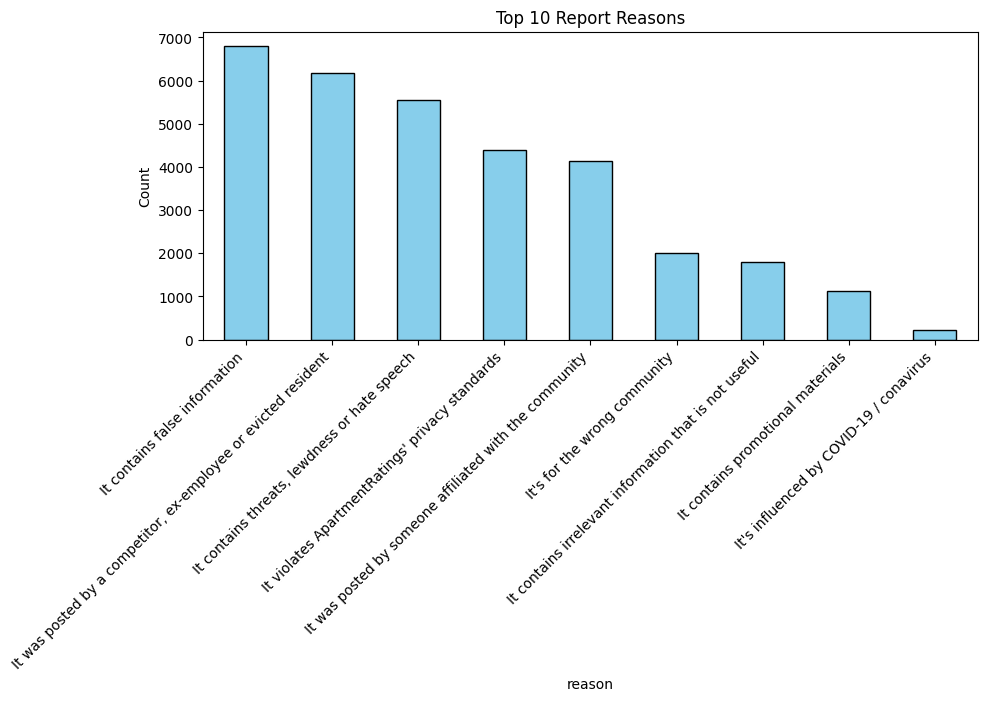

In [3]:
import matplotlib.pyplot as plt

# Count reasons
reason_counts = df["reason"].value_counts()

# Display top 10 reasons
print(reason_counts.head(10))

# Plot
plt.figure(figsize=(10,4))
reason_counts.head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Report Reasons")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


reason
It violates ApartmentRatings' privacy standards                   1194.1
It contains threats, lewdness or hate speech                      1117.9
It was posted by a competitor, ex-employee or evicted resident    1067.3
It contains false information                                     1004.5
It's for the wrong community                                       966.3
It's influenced by COVID-19 / conavirus                            872.1
It contains irrelevant information that is not useful              817.8
It was posted by someone affiliated with the community             593.4
It contains promotional materials                                  558.6
Name: text_len, dtype: float64


/var/folders/gz/bhmz7vj94s7207h9k2_rgndc0000gn/T/ipykernel_71494/3205399758.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


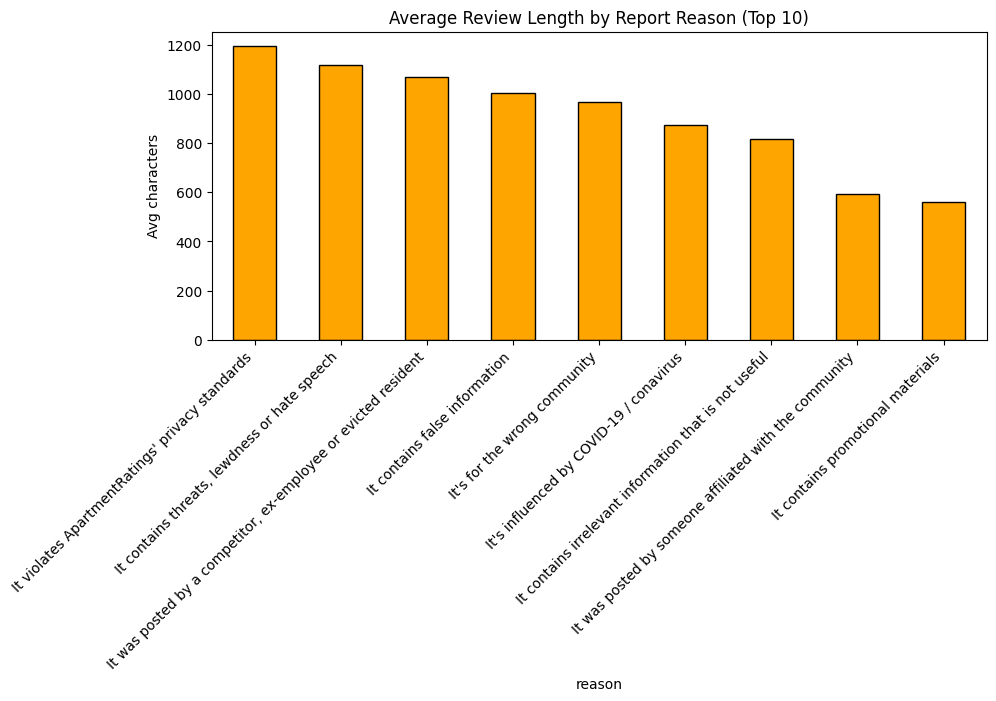

In [4]:
mean_len = df.groupby("reason")["text_len"].mean().sort_values(ascending=False)
print(mean_len.head(10).round(1))

plt.figure(figsize=(10,4))
mean_len.head(10).plot(kind="bar", color="orange", edgecolor="black")
plt.title("Average Review Length by Report Reason (Top 10)")
plt.ylabel("Avg characters")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


hour_of_day
0      274
1      196
2      173
3      213
4      324
5      843
6     1582
7     2290
8     2399
9     2564
10    2667
11    2730
12    2660
13    2786
14    2000
15    1568
16    1313
17    1053
18    1027
19     936
20     895
21     753
22     518
23     416
Name: count, dtype: int64


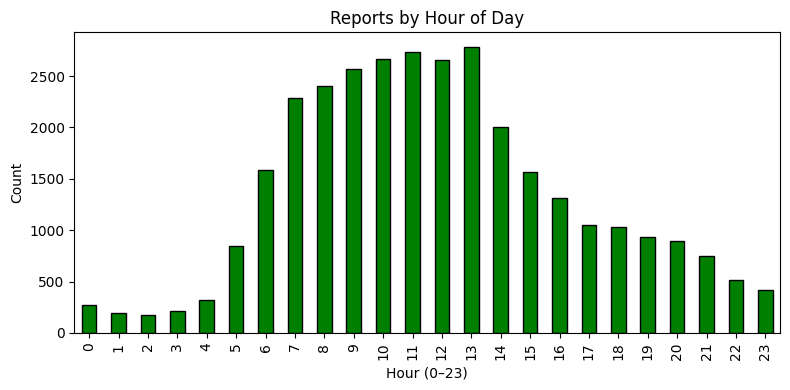

In [5]:
hour_counts = df["hour_of_day"].value_counts().sort_index()
print(hour_counts)

plt.figure(figsize=(8,4))
hour_counts.plot(kind="bar", color="green", edgecolor="black")
plt.title("Reports by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## 📊 Insights Summary

### 1️⃣ Top Report Reasons
Most reports are about **false information**, **competitor/ex-employee posts**, and **hate speech**.  
These three categories represent the majority of reported content, suggesting that the main moderation challenges involve **content authenticity**, **bias**, and **toxicity**.  
This helps define the key classes for a future text-classification model.

---

### 2️⃣ Average Review Length by Reason
Longer reviews are typically associated with **privacy or hate-speech violations**,  
while shorter ones are linked to **promotional or spam content**.  
This indicates that review length could be a meaningful feature for the model —  
emotional or privacy-related posts tend to be more detailed, while spam reviews are brief and repetitive.

---

### 3️⃣ Reports by Hour of Day
Reports peak between **6 AM and 2 PM**, especially around **10–12 PM**.  
This pattern implies that most reporting activity happens during business hours,  
possibly by **moderation staff** rather than residents.  
This insight can inform system scheduling and resource planning for automated moderation tools.

---

### 🧠 Overall Takeaways
- The dataset is well-balanced enough to build a **multi-class classification model** for report reasons.  
- **Text features** (e.g., review length, keywords) are likely to be strong indicators of report categories.  
- Temporal trends suggest that moderation behavior is **time-dependent**, useful for workflow optimization.

Next step → Build a baseline text classifier (TF-IDF + Logistic Regression) to predict report reasons.
